In [ ]:
#Sentiment analysis with financial news

In [7]:
#Intoroduction


In [2]:
#Importing required libraries

In [9]:
!pip install rake-nltk
!pip install textstat
!pip install stylecloud
!pip install textblob
!pip install eli5

import pandas as pd

import spacy
nlp = spacy.load('en_core_web_lg')
import textstat
from rake_nltk import Rake
r = Rake()
from textblob import TextBlob

import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import seaborn as sns
import stylecloud
from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.utils import resample
from sklearn.metrics import classification_report

import eli5

import warnings
warnings.filterwarnings('ignore')

#import spacy.cli
#spacy.cli.download("en_core_web_lg")
#nlp = spacy.load("en_core_web_lg")
#import nltk
#nltk.download('stopwords')

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.

anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.

jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.


  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=a8d2df304235a34ec21522d9b4d84c1ca2685c2985f3d1196b2ed9f2ac0cf73d
  Stored in directory: c:\users\navee\appdata\local\pip\cache\wheels\7b\26\a5\8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


In [10]:
#Loading the data
df = pd.read_csv(r'C:\Datasets\Finance data NLP.csv')

In [12]:
#Reading the first five rows in the dataset
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [14]:
#Shape of the dataset(Number of rows and columns)
df.shape

(5842, 2)

In [ ]:
#EDA

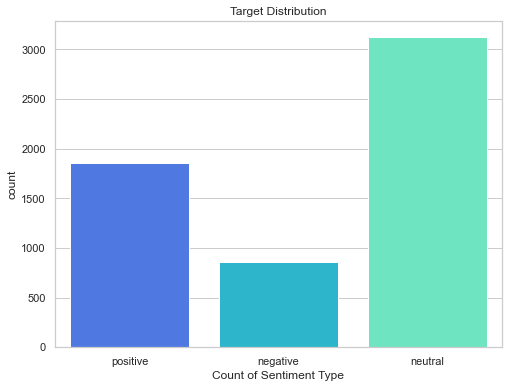

<Figure size 432x288 with 0 Axes>

In [15]:
#Target Distribution(Comment distribution)
sns.set_theme(style="whitegrid")
sns.set_palette('rainbow')
plt.figure(figsize=(8,6))
sns.countplot(x=df['Sentiment'])
plt.xlabel('Count of Sentiment Type')
plt.title('Target Distribution')
plt.show()
plt.savefig('Target Distribution')

In [ ]:
#Results: We have more neutral comments, we can say this dataset is imbalanced. To analyze the neutral comments to see if it comes in Positive or Negative
#we have to calculate length of each sentence, because length varies substantialy by class.

In [17]:
#Calculating length of each sentence
df['Sentence Length'] = df['Sentence'].apply(lambda x : textstat.lexicon_count(x, removepunct=True))

#Boxplot to see the distribution of sentence lenght across classes

df_positive = df.loc[df['Sentiment'] == 'positive']
df_negative = df.loc[df['Sentiment'] == 'negative']
df_neutral = df.loc[df['Sentiment'] == 'neutral']


fig = make_subplots(rows=1, cols=3)

fig.append_trace(
    go.Box(name='Positive', y=df_positive['Sentence Length']),
    row=1, col=1
)

fig.append_trace(
    go.Box(name='Negative', y=df_negative['Sentence Length']),
    row=1, col=2
)

fig.append_trace(
    go.Box(name='Neutral', y=df_neutral['Sentence Length']),
    row=1, col=3
)



fig.update_layout(height=500, width=700, title_text="Distribution of Sentence Length across classes")
fig.show()

In [21]:
#Results: It is more or less same across the classes, the sentence length is invarient to sentiment type

In [20]:
#Lets take the top 100 phrases for each class in a tabular form.
negative_corpus = df_negative['Sentence'].tolist()
negative_corpus = " ".join(negative_corpus)
r.extract_keywords_from_text(negative_corpus)
top_phrases_neg = r.get_ranked_phrases()[0:100]


positive_corpus = df_positive['Sentence'].tolist()
positive_corpus = " ".join(positive_corpus)
r.extract_keywords_from_text(positive_corpus)
top_phrases_pos = r.get_ranked_phrases()[0:100]

neutral_corpus = df_neutral['Sentence'].tolist()
neutral_corpus = " ".join(neutral_corpus)
r.extract_keywords_from_text(neutral_corpus)
top_phrases_neutral = r.get_ranked_phrases()[0:100]

pd.DataFrame({'Top Negative Phrases':top_phrases_neg,'Top Positive Phrases':top_phrases_pos,'Top Neutral Phrases':top_phrases_neutral})

,Top Negative Phrases,Top Positive Phrases,Top Neutral Phrases
0,tsla tullow oil suspends dividend amid oil pri...,companiescar insurer hastings group driving â ...,ñlt kostenlos sechs monate lang updates und ha...
1,70 billion bg deal meets shareholder skepticis...,irish housebuilder cairn homes plans london li...,neste oil corporation refining operation asset...
2,comparatives leave bitter taste london marketw...,borealis infrastructure putting together new s...,nasdaq omx helsinki major media comptel dynami...
3,"6 %, big trader added 10000 april put contract...",banco bpi entertainment one dispels itv takeov...,nasdaq omx helsinki major media comptel dynami...
4,fee failings finnish management software solut...,friends life lead ftse 100 gainers brazilian m...,petrofac share price rises despite â £ 30m costs
...,...,...,...
95,adjusted underlying ebitda actually amounts,finnish metal products company componenta oyj hel,finnish business software group affectogenimap...
96,tsla samsung currently occupies third place,old mutual q1 gross sales beat forecasts,finnish electronics contract manufacturer scan...
97,stora chief executive jouko karvinen,turkish steel company doktas dokumculuk ticaret,finnish aluminium products manufacturer nordic...
98,systems provider efore oyj said,scraps viiv ipo kesko agro lietuva,high winds also toppled three semi


In [22]:
#spaCy's built in NER model can be used to determine the counts of companies, top executives and countries. Those are also called entities.

def ner_counter(doc):
    gpe_count = 0
    org_count = 0
    person_count = 0
    money_count=0
    for tok in doc.ents:
        if tok.label_ == "GPE":
            gpe_count = gpe_count + 1
        elif tok.label_ == "ORG":
            org_count=org_count+1
        elif tok.label_ == "PERSON":
            person_count=person_count+1
        elif tok.label_ == "MONEY":
            money_count=money_count+1
    return (gpe_count,org_count,person_count,money_count)

sentences = df['Sentence'].tolist()
sentences = " ".join(sentences)
sentences = nlp(sentences)
entity_counts = list(ner_counter(sentences))
entity_df = {'Entity Type':['GPE', 'ORG', 'PERSON', 'MONEY'],
        'Count':entity_counts}
fig = px.bar(entity_df,x='Entity Type',y='Count',color='Entity Type',text_auto=True)
fig.update_layout(height=500,width=500)

In [ ]:
#GPE is Geopolitical entity(countries, state)
#ORG is Companies(9organization)
#PERSON is people, mostly politicians, executives who are listed in top position.

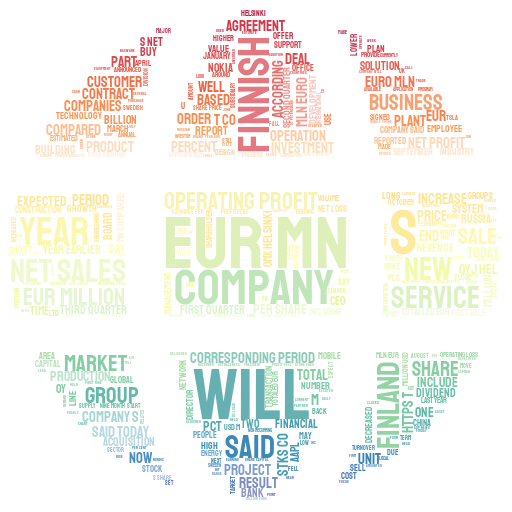

In [23]:
#Wordcloud- It is a visualization technique for text data, each word is picturized with importance in the context or its frequency.

sentences = df['Sentence'].tolist()
corpus = " ".join(sentences)
stylecloud.gen_stylecloud(corpus,
                          icon_name = 'fas fa-globe',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='white',gradient='vertical',stopwords=True
                          )


Image(filename='stylecloud.png') 

In [ ]:
#Predictive Modelling

#For text classification SGDClassifier is one of the best statistical methods.

In [24]:
X_train,X_test,y_train,y_test = train_test_split(df['Sentence'], df['Sentiment'])
SD_clf = Pipeline([('cv', CountVectorizer(ngram_range=(1,2))),('clf',  SGDClassifier(class_weight = 'balanced',max_iter=10000,n_iter_no_change=10))])

SD_clf.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer(ngram_range=(1, 2))),
                ('clf',
                 SGDClassifier(class_weight='balanced', max_iter=10000,
                               n_iter_no_change=10))])

In [25]:
SD_clf.score(X_test, y_test)

0.6707734428473648

In [ ]:
#Results: Thats actually a bad accuracy score, as we have imbalance neutral data in the dataset.
#Lets see our classification-metrics.

In [26]:
y_pred = SD_clf.predict(X_test)
pd.DataFrame(classification_report(y_pred,y_test,output_dict=True)).T

,precision,recall,f1-score,support
negative,0.244792,0.230392,0.237374,204.000000
neutral,0.786925,0.719823,0.751880,903.000000
positive,0.638826,0.799435,0.710163,354.000000
accuracy,0.670773,0.670773,0.670773,0.670773
macro avg,0.556848,0.583217,0.566472,1461.000000
weighted avg,0.675342,0.670773,0.669931,1461.000000


In [ ]:
#Results: We have poor precision and recall scores for the 'negative' class, as the class is imbalanced.

In [ ]:
#Oversampling can us with the issue

In [27]:
df_neutral = df[(df['Sentiment']=='neutral')] 
df_negative = df[(df['Sentiment']=='negative')]
df_positive = df[(df['Sentiment']=='positive')]


# upsample minority classes
df_negative_upsampled = resample(df_negative, 
                                 replace=True,    
                                 n_samples= 2000, 
                                 random_state=42)  

df_positive_upsampled = resample(df_positive, 
                                 replace=True,    
                                 n_samples= 2000, 
                                 random_state=42)


# Concatenate the upsampled dataframes with the neutral dataframe
df_upsampled = pd.concat([df_negative_upsampled,df_neutral,df_positive_upsampled])

In [28]:
#We are going to fit the model again where the negative and positive class is oversampled by 2000 samples each.
X_train,X_test,y_train,y_test = train_test_split(df_upsampled['Sentence'], df_upsampled['Sentiment'])
SD_clf_upsampled = Pipeline([('cv', CountVectorizer(ngram_range=(1,2))),('clf',  SGDClassifier(class_weight = 'balanced',max_iter=20000,n_iter_no_change=10))])

SD_clf_upsampled.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer(ngram_range=(1, 2))),
                ('clf',
                 SGDClassifier(class_weight='balanced', max_iter=20000,
                               n_iter_no_change=10))])

In [29]:
SD_clf_upsampled.score(X_test, y_test)

0.826135726303982

In [ ]:
#Results: By oversampling we acheived a accuaracy score of 83% and that's actaually good with the unsampled dataset.

In [30]:
y_pred = SD_clf_upsampled.predict(X_test)
pd.DataFrame(classification_report(y_pred,y_test,output_dict=True)).T

,precision,recall,f1-score,support
negative,0.883168,0.754653,0.813869,591.000000
neutral,0.789604,0.849534,0.818473,751.000000
positive,0.827660,0.882086,0.854007,441.000000
accuracy,0.826136,0.826136,0.826136,0.826136
macro avg,0.833477,0.828758,0.828783,1783.000000
weighted avg,0.830030,0.826136,0.825736,1783.000000


In [ ]:
#Results: Precision, recall and F1 increased for all the classes(positive, negative and neutral)

In [ ]:
#To interupt the model we can use Eli5

In [31]:
eli5.explain_weights(SD_clf_upsampled)

Explanation(estimator="Pipeline(steps=[('cv', CountVectorizer(ngram_range=(1, 2))),\n                ('clf',\n                 SGDClassifier(class_weight='balanced', max_iter=20000,\n                               n_iter_no_change=10))])", description="\nFeatures with largest coefficients per class.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target='negative', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='down', weight=1.536761999784063, std=None, value=None), FeatureWeight(feature='decreased', weight=1.1802937077681452, std=None, value=None), FeatureWeight(feature='short', weight=1.0959252515831825, std=None, value=None), FeatureWeight(feature='decreased to', weight=1.0455959624950308, std=None, value=None), FeatureWeight(feature='recall', weight=0.9911994804326338, std=None, value=None), FeatureWeight(feature='spy', weight=0.9451437685641422, std=None, value=None), FeatureWeight(feature='tsla', weight=0.9334047750190491, std=None, value=None), FeatureWeight(feature='dropped', weight=0.9178796980753542, std=None, value=None), FeatureWeight(feature='eur0 05', weight=0.9075747192009709, std=None, value=None), FeatureWeight(feature='below', weight=0.8947966877306933, std=None, value=None), FeatureWeight(feature='fall', weight=0.8846482762148976, std=None, value=None), FeatureWeight(feature='lower', weight=0.8765957322947568, std=None, value=None), FeatureWeight(feature='weak', weight=0.8734643851229845, std=None, value=None), FeatureWeight(feature='tsla recall', weight=0.8236510566483679, std=None, value=None), FeatureWeight(feature='dropped to', weight=0.7596043319384054, std=None, value=None), FeatureWeight(feature='declined', weight=0.7515304379239115, std=None, value=None)], neg=[FeatureWeight(feature='<BIAS>', weight=-1.7523998876060831, std=None, value=None), FeatureWeight(feature='rose', weight=-0.8646574712023612, std=None, value=None), FeatureWeight(feature='rose to', weight=-0.8298781675013166, std=None, value=None), FeatureWeight(feature='loss before', weight=-0.7820005809147093, std=None, value=None)], pos_remaining=8860, neg_remaining=19038), proba=None, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target='neutral', feature_weights=FeatureWeights(pos=[FeatureWeight(feature='welcome', weight=0.9254594144314485, std=None, value=None), FeatureWeight(feature='it not', weight=0.5982196839001432, std=None, value=None), FeatureWeight(feature='amounted to', weight=0.5940307072904328, std=None, value=None), FeatureWeight(feature='amounted', weight=0.5940307072904328, std=None, value=None), FeatureWeight(feature='not', weight=0.5878122885965317, std=None, value=None), FeatureWeight(feature='eur0 38', weight=0.5784326235791568, std=None, value=None)], neg=[FeatureWeight(feature='positive', weight=-0.8156015514553944, std=None, value=None), FeatureWeight(feature='up from', weight=-0.6887301990067718, std=None, value=None), FeatureWeight(feature='mn up', weight=-0.6706057200855443, std=None, value=None), FeatureWeight(feature='increased', weight=-0.6526893890703849, std=None, value=None), FeatureWeight(feature='finnlines pretax', weight=-0.6524812411643159, std=None, value=None), FeatureWeight(feature='signed', weight=-0.640619412367027, std=None, value=None), FeatureWeight(feature='05', weight=-0.6403956533680079, std=None, value=None), FeatureWeight(feature='increase', weight=-0.6337453277689943, std=None, value=None), FeatureWeight(feature='strong', weight=-0.6294210550203494, std=None, value=None), Feat

In [ ]:
#Conclusion

In [ ]:
#Negative classes are shown in the results with verbs such as 'decreased', 'fall', 'lower', 'down'.
#True classes are shown in the results with verbs with 'up', 'grew', 'rise', which indicates a positive sentiment.

#Models rely on adjectives and adverbs for sentiment classification

#Neutral and positive classes distinction is very subjective and it varies across people.

#Any model will have hard time to distinguish between them.


In [ ]:
#Future implementations to improve accuracy scores.

#(1). NLP augumentations.
#(2). nlpaug or snorkel.